# Python / Numpy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
import numpy as np

def compute_mean(data):
    return np.mean(data)

def compute_std(data):
    return np.std(data)

# Generate samples from the normal distribution using scipy
from scipy.stats import norm

# Sample from normal distribution
mean, std_dev = 0, 1  # Mean and standard deviation for the normal distribution
samples = norm.rvs(loc=mean, scale=std_dev, size=1000)

# Compute mean and standard deviation using custom functions
mean_custom = compute_mean(samples)
std_custom = compute_std(samples)

# Compute mean and standard deviation using numpy methods
mean_np = np.mean(samples)
std_np = np.std(samples)

print(f"Custom Mean: {mean_custom}, Numpy Mean: {mean_np}")
print(f"Custom Std Dev: {std_custom}, Numpy Std Dev: {std_np}")


Custom Mean: 0.004698520314567704, Numpy Mean: 0.004698520314567704
Custom Std Dev: 0.995032035094194, Numpy Std Dev: 0.995032035094194


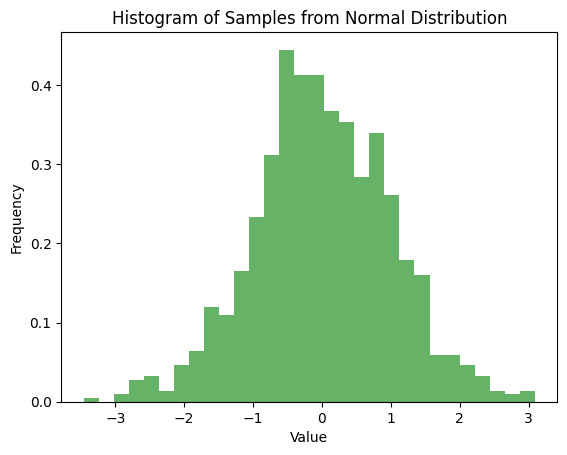

In [7]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Samples from Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


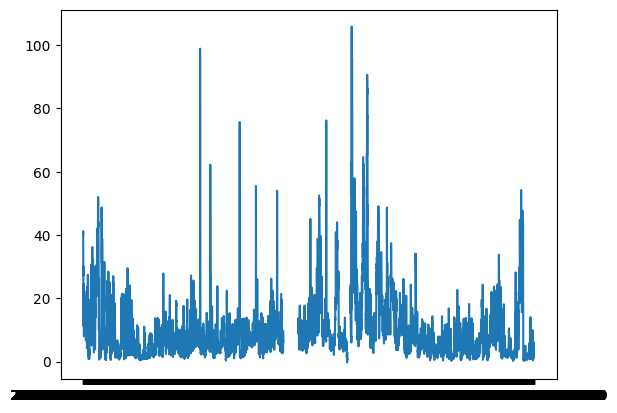

In [11]:
import pandas as pd

frame_2021 = pd.read_csv('2021-PM2.5.csv')

plt.plot(frame_2021['Date'], frame_2021['BV-MC'])

          ED-MC
Date           
1      6.933962
2      4.330551
3      4.519515
4      4.746732
5      5.061186
6     10.542083
7     12.696226
8     22.132070
9     10.610987
10     3.722467
11     4.914345
12     4.577379


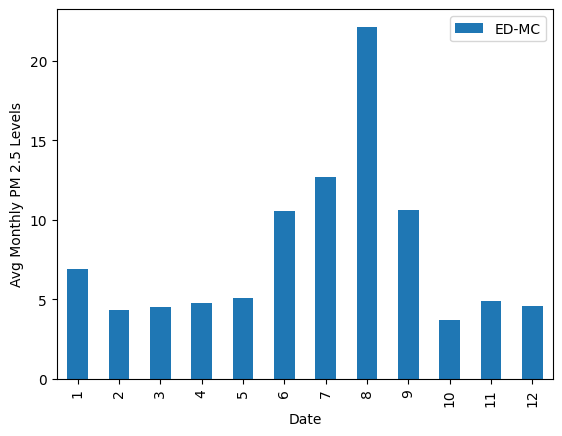

In [12]:
# Plot the mean pm2.5 level for each month using a bar chart. 
dataFrame = pd.read_csv("2021-PM2.5.csv")
dataFrame = dataFrame[['Date', 'ED-MC']]
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])
dataFrame.set_index('Date', inplace=True)
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
print(monthAvgs)
monthAvgs.plot(kind="bar")
plt.ylabel('Avg Monthly PM 2.5 Levels')
plt.show()

Insights: 
The average PM2.5 level is generally higher during summer seasons, with a peak appearing in August, while the average levels for other
seasons are comparably lower. This high positive correlation with temperature may be a proof of the climates impact on air quality. SLC is a typical dry-summer continental climate, where it is extremely dry and usually windless in the summer. Less rain will result to the PM2.5 molecules in the air not being covered and taken away with the rain, and less wind will slower the process of dillute the PM2.5 density.

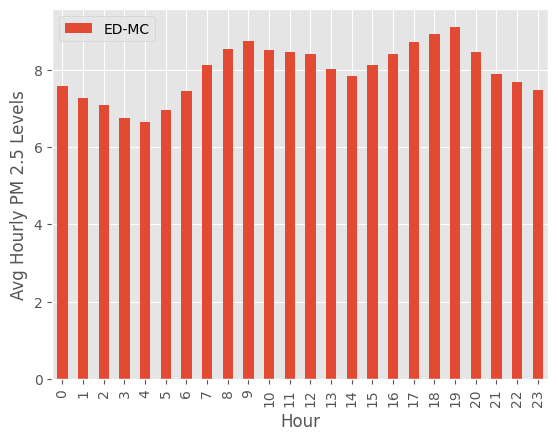

In [18]:
# group the data by time of day (by hour), and plot the mean pollution level for each hour
hourAvgs = dataFrame.groupby(dataFrame.index.hour).mean()
hourAvgs.plot(kind="bar")
plt.ylabel('Avg Hourly PM 2.5 Levels')
plt.xlabel('Hour')
plt.show()

Insights:
The hourly PM2.5 level is typically higher during day time, specifically during hours with high human actions, with two peaks appearing
at 9:00 and 18:00. These are the typical 'go to work hour' and 'off work hour' and is therefore rush hour for traffic. This plot indicates that
PM2.5 level is highly related to human activity especially highly positively related to the use of provate vehicles.

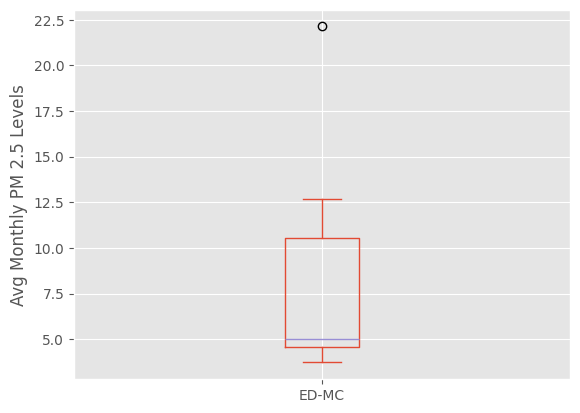

In [19]:
#Use Box and Whisker plots of the monthly data groupings to provide a more complete view of the data.
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
monthAvgs.plot(kind="box")
plt.ylabel('Avg Monthly PM 2.5 Levels')
plt.show()

Insights:
The box and whisker plot shows that the montly PM2.5 levels are highly uneven and theres more months above the median value.

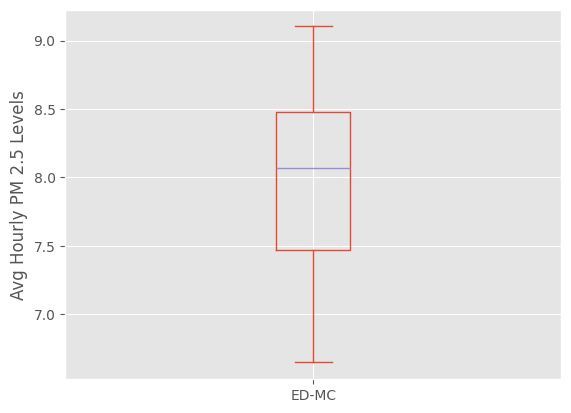

In [20]:
#Use Box and Whisker plots of the hourly data groupings to provide a more complete view of the data.
hourAvgs.plot(kind="box")
plt.ylabel('Avg Hourly PM 2.5 Levels')
plt.xlabel('')
plt.show()

Insights:
The box and whiskers plot shows the hourly PM2.5 level is evenly distributed.